<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/machine_learning/knn_svm_zoo_animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbours and Support Vector Machine Classification

This exercise explores the application of two machine learning methods - k-nearest neighbours and support vector machine - to a dataset of zoo animals. The objective is to be able to predict the class of the animal based on its traits or features.

This dataset consists of 101 animals from a zoo.
There are 16 variables with various traits to describe the animals.

The 7 Class Types are:
Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate.

Dataset:
zoo.csv

| # | Attribute name | Attribute values |
|---|---|---|
| 1 | animal name | Unique for each instance |
| 2 | hair | Boolean |
| 3 | feathers | Boolean |
| 4 | eggs | Boolean |
| 5 | milk | Boolean |
| 6 | airborne | Boolean |
| 7 | aquatic | Boolean |
| 8 | predator | Boolean |
| 9 | toothed | Boolean |
| 10 | backbone | Boolean |
| 11 | breathes | Boolean |
| 12 | venomous | Boolean |
| 13 | fins | Boolean |
| 14 | legs | Numeric (set of values {0,2,4,5,6,8}) |
| 15 | tail | Boolean |
| 16 | domestic | Boolean |
| 17 | catsize | Boolean |
| 18 | type | Numeric (integer values in range [1,7]) |

## Imports and theme

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d",
    "light": "#fefeff", "stone": "#8f8f94",
    "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3",
    "yellow": "#e6daaa"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

## Understand the data

In [ ]:
df = pd.read_csv("zoo.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


As introduced in the problem description, the dataset contains the details of 101 animals, each with 17 features.

The majority (15) of those features are boolean (e.g., lays eggs or doesn't lay eggs); the exceptions are "animal_name" (e.g. "boar", unique to each animal) and "legs", an integer from 0 to 8.

Finally, each entry is associated with a class_type attribute between 1 and 7, which identifies the animal as belonging to one of the following classes:
1	Mammal,
2	Bird,
3	Reptile,
4	Fish,
5	Amphibian,
6	Bug, and
7	Invertebrate.

## Clean the data

We saw earlier from the df.info() call that there is no missing data in this dataset.

15 of the 17 features are boolean, so should not be subject to concerns of outlier data. Likewise, animal_name is a unique identifier.

The legs category may exhibit outliers, but we will want to scale this feature later on to prevent our model from putting undue weight onto this feature (since the boolean categories will all be either 0 or 1, the model may mistakenly identify number of legs as being more important than it truly is, due to the fact that this number can range from 0 to 8 in our dataset).

For now, we can sum the boolean features to get a sense of how frequent they are within this dataset, and examine the proportion of entries that fall into the legs and class_type bins.

In [ ]:
boolean_df = df.drop(columns=["animal_name", "legs", "class_type"]).copy()
boolean_df.sum()

hair        43
feathers    20
eggs        59
milk        41
airborne    24
aquatic     36
predator    56
toothed     61
backbone    83
breathes    80
venomous     8
fins        17
tail        75
domestic    13
catsize     44
dtype: int64

Above, we can see that the least common features are "venomous" and "domestic", applying to just 8 and 13 of the 101 animals, respectively. The most common features are "backbone", "breathes" and "tail", applying to 83, 80, and 75 of the animals in the dataset.

In [ ]:
class_counts = df.groupby("class_type").size()
class_counts

class_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
dtype: int64

Mammals account for close to 41% of the data points, whereas Amphibians and Reptiles account for just around 4% and 5%, respectively. We can anticipate that our models may struggle to correctly identify samples from those classes.

In [ ]:
leg_counts = df.groupby("legs").size()
leg_counts

legs
0    23
2    27
4    38
5     1
6    10
8     2
dtype: int64

With the exception of five- and eight-legged animals in the dataset (starfish, octopus, and scorpion), the legs feature appears to be fairly evenly spread across the dataset. We noted already that we will likely need to scale this feature for further handling; we can review at that stage whether additional measures are needed.

## Remove unused features

We can produce a correlation heatmap for our features, to get an understanding of which features are likely to be of use to our model in identifying the class to which each animal belongs.

For the purpose of the heatmap, we will drop the animal_name and class_type columns; animal_name is unique to each animal and has no bearing on the inherent features of the animals. The class_type column is dropped because this is what we will want to predict, and the numbers assigned for each class are arbitrary rather than indicating an actual quality of the animals in each class.

In [ ]:
corr_df = df.drop(columns=["animal_name", "class_type"]).copy()
corr_matrix = corr_df.corr()
corr_matrix = corr_matrix.apply(pd.to_numeric, errors="coerce")

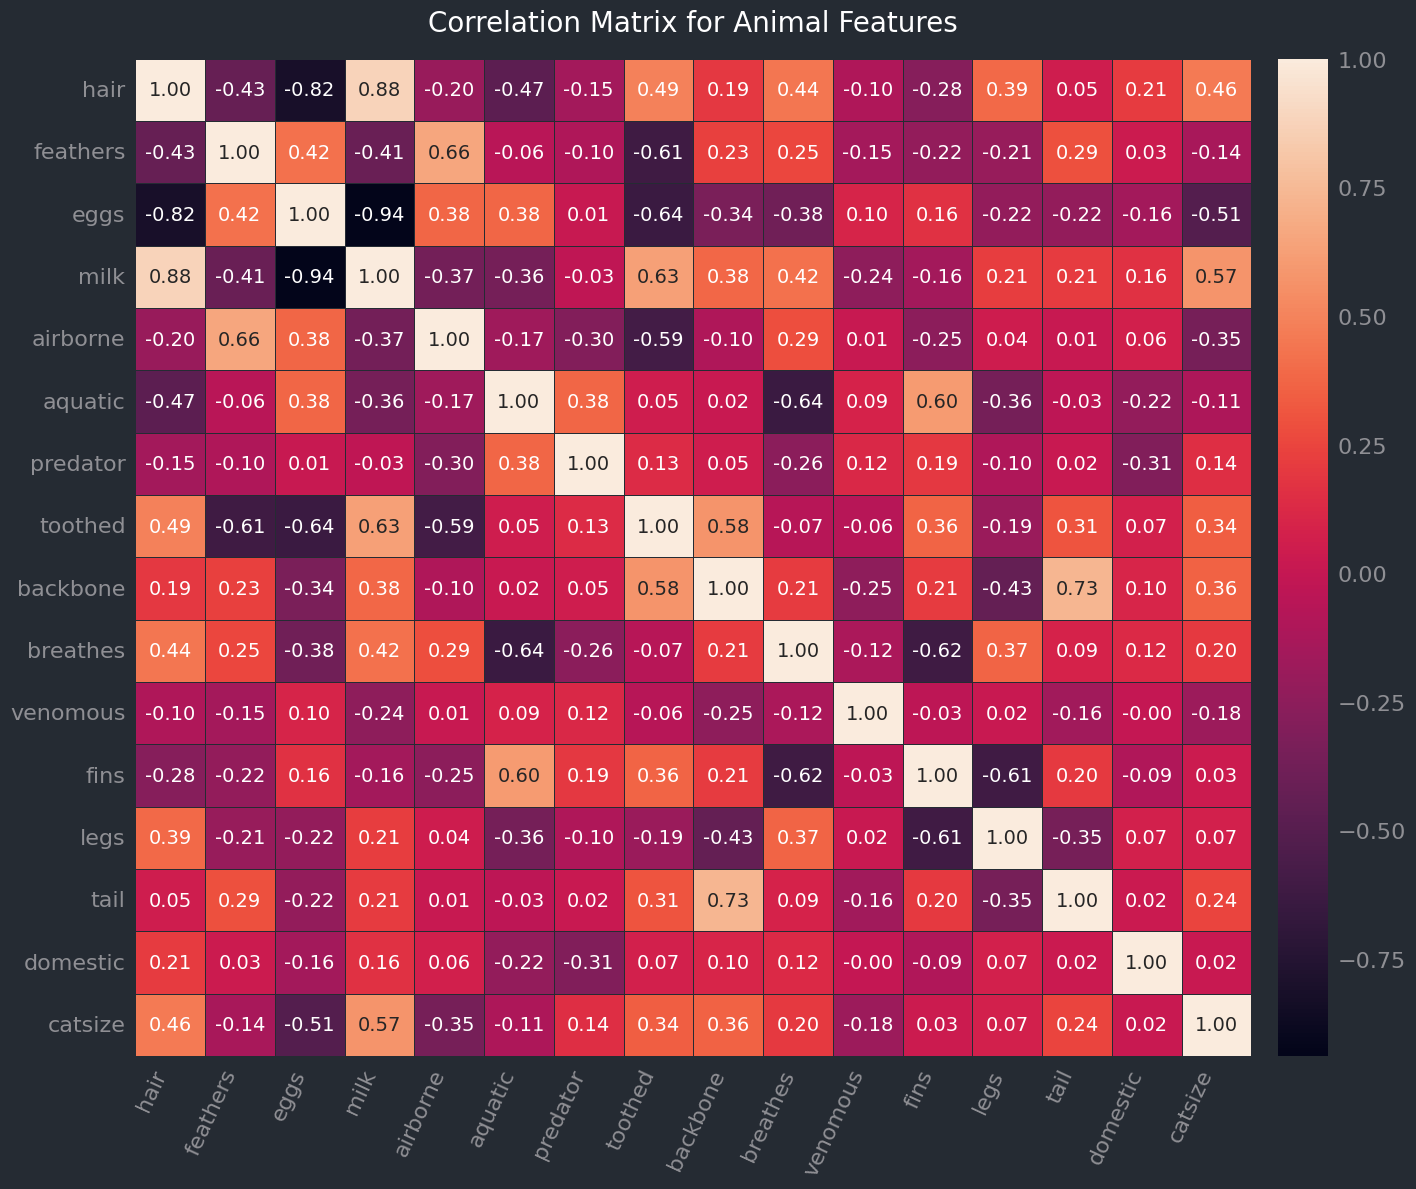

In [ ]:
# Check correlations with Seaborn heatmap for info on unhelpful features
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))
# Set up heatmap
hmap = sns.heatmap(corr_matrix,
                   annot=True,
                   annot_kws={"size": 14},
                   fmt=".2f",
                   linewidth=0.5,
                   # cmap=custom_cmap,
                   linecolor=palette["dark"],
                   cbar_kws={"pad": 0.02}
)
# Remove ticks from x and y axes (left and bottom)
hmap.tick_params(left=False, bottom=False)
# Remove ticks from cbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)
# Set descriptors
hmap.set_title("Correlation Matrix for Animal Features",
               fontdict={"size": 20, "color": palette["light"]},
               pad=20)
plt.xticks(fontsize=16, color=palette["stone"], rotation=65, ha="right")
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
cbar.ax.tick_params(labelsize=16, labelcolor=palette["stone"])

plt.tight_layout()
plt.show()

To simplify our model (and improve its generalisation), it will be beneficial to reduce the dimensionality of the dataset.

The heatmap displayed above shows the correlations between our 16-dimensional dataset - since we have dropped the animal_name feature, and removed the target class_type.

Examining the correlations between these 16 features, we can observe that certain features are very strongly positively- or negatively-correlated with others, or exhibit no correlation with any other of the features.

#### "eggs" and "milk"

The "eggs" and "milk" features have a very strong negative correlation of -0.94, making them almost perfectly inversely correlated. Scanning each of these features' correlations with the other 14 features, we can also observe that their correlations with other categories are very closely inverse to each other.

For example: "eggs" and "hair" have a -0.82 correlation; "milk" and "hair" have a +0.88 correlation. "eggs" and "aquatic" have a +0.38 correlation; "milk" and "aquatic" have a -0.36 correlation. This pattern is visible across each of the features, and makes intuitive sense since with the exception of the platypus, mammals do not lay eggs, and milk-producing animals are exclusive to mammals.

We may opt to remove one of these features, since they are close to being proxies for each other.

Noting that "milk" is also highly correlated with "hair", and that "hair" exhibits similar correlation patterns with "eggs" as "milk" does with "eggs", we may decide to remove "milk" from the model, on the expectation that the difference in correlation will be better captured by "hair".

#### "aquatic" and "breathes"

The "aquatic" and "breathes" features have a strong negative correlation of -0.64, and exhibit a similar inverse relationship with the other features of the dataset. This also makes intuitive sense, since animals that live in water typically will not breathe oxygen, and vice versa.

#### "fins" and "legs"

With the exception of sealions, animals with fins have zero legs, and thus will be captured by the "legs" feature, which provides more nuance through the count of legs per animal. Categorising based on fins also carries the risk of mislabelling the sealion, so is appropriate to be removed also.

#### "domestic" and "predator"

The "domestic" and "predator" features have weak correlations with every other feature; its predictive ability is likely to be low, and can be removed

#### "tail" and "backbone"

The "tail" feature has weak correlations with all features other than "backbone"; since "backbone" appears to have more varied correlations with the remaining features, we may retain this in place of "tail" for its greater explanatory power.

In [ ]:
columns_to_remove = ["animal_name", "milk", "aquatic", "fins", "domestic", "predator", "tail"]

To avoid inadvertently removing useful features, we can stop removing features at this stage, and proceed with model creation - if needed we can reintroduce or remove features at a later stage if we find that our model is overly simplistic.

For now, we will remove the six features as described above, and build a model for our reduced 10-dimensional dataset.

In [ ]:
model_df = df.drop(columns=columns_to_remove).copy()
model_df

,hair,feathers,eggs,airborne,toothed,backbone,breathes,venomous,legs,catsize,class_type
0,1,0,0,0,1,1,1,0,4,1,1
1,1,0,0,0,1,1,1,0,4,1,1
2,0,0,1,0,1,1,0,0,0,0,4
3,1,0,0,0,1,1,1,0,4,1,1
4,1,0,0,0,1,1,1,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,0,1,1,1,0,2,1,1
97,1,0,1,1,0,0,1,1,6,0,6
98,1,0,0,0,1,1,1,0,4,1,1
99,0,0,1,0,0,0,1,0,0,0,7


## Feature scaling and transformations

As noted above, the "legs" feature is likely to induce errors in its present form: the other features are all boolean, whereas "legs" can take integers from 0 to 8. To handle this, we can scale the legs feature using scikit-learn's scaling methods.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
legs_values = model_df["legs"].values.reshape(-1, 1)
# Instantiate the StandardScaler
scaler = StandardScaler()
# Fit and transform "legs" values
legs_scaled = scaler.fit_transform(legs_values)
# Replace the original "legs" values with the scaled values in your DataFrame
model_df["legs"] = legs_scaled

## Prepare data for training

Next, we can prepare our data for modelling using a training and test split. Since we already identified that some class_types, such as reptile and amphibian, are underrepresented in the dataset, we accomodate for this by using scikit-learn's "stratify" parameter on the class_type label.

In [ ]:
# Take all 10 remaining features as X values; last column is the target, class_type
X=model_df.iloc[:,:-1].values
Y=model_df.class_type.values
#Split data into training & test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y)

## K-Nearest Neighbours

First, we can train our current 10-dimensional model using KNN.

In [ ]:
# Call KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Initiate classifier
model = KNeighborsClassifier()
# Pass data to classifier
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1, 2, 1, 6, 6, 7, 1, 1, 1, 2, 5, 1, 6, 1, 2, 1, 1, 2, 4, 4, 2, 1,
       1, 7, 2, 4], dtype=int64)

In [ ]:
y_test

array([1, 2, 1, 6, 6, 7, 1, 1, 1, 2, 5, 1, 7, 1, 2, 1, 1, 2, 4, 4, 3, 1,
       1, 7, 2, 4], dtype=int64)

### KNN 10-dimensional model results

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result1 = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (10-dim model): {result1:.2%}")

print(classification_report(y_test, y_pred))

Our initial 10-dimensional KNN model has an accuracy score of 92.31%.

This isn't terrible, but isn't perfect either. In particular, we can see that the model is consistently failing to correctly identify members of the Invertebrate class_type (7), instead identifying them as belonging to Bug (6).

Also, the lone Reptile class_type (3) entry in the test set is misclassified as Fish (4). Earlier we noted the likelihood of problems arising from the fact that there were only a small number of examples present from the Reptile (3) and Amphibian (5) classes. This is true also of the Invertebrate class.

To be able to compare our 10-dimensional model's performance, let's get a benchmark by obtaining the accuracy score for the 16-dimensional dataset (all features other than animal_name).

### KNN 16-dimensional model results

In [ ]:
dim_16_df = df.copy()
legs_values = dim_16_df["legs"].values.reshape(-1, 1)
# Instantiate the StandardScaler
scaler = StandardScaler()
# Fit and transform "legs" values
legs_scaled = scaler.fit_transform(legs_values)
# Replace the original "legs" values with the scaled values in your DataFrame
dim_16_df["legs"] = legs_scaled

In [ ]:
# Take all features other than animal_name as X values; last column is the target, class_type
X=dim_16_df.iloc[:,1:-1].values
Y=dim_16_df.class_type.values
#Split data into training & test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y)

In [ ]:
# Call KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Initiate classifier
model = KNeighborsClassifier()
# Pass data to classifier
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([6, 2, 6, 1, 1, 3, 4, 6, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 7, 1, 1,
       7, 5, 4, 1], dtype=int64)

In [ ]:
y_test

array([6, 2, 7, 1, 1, 3, 4, 6, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 7, 1, 1,
       7, 5, 4, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (16-dim model): {result:.2%}")

print(classification_report(y_test, y_pred))

KNN Accuracy (16-dim model): 96.15%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.96        26
   macro avg       0.95      0.95      0.94        26
weighted avg       0.97      0.96      0.96        26



We can see that the full 16-dimensional model in fact far outperforms our reduced 10-dimensional model, with an accuracy of 96.15% compared with 92.31%.

This suggests that our earlier assumptions regarding the removal of features were incorrect.

However, these accuracy measures are derived from just a single run of each model.

To better understand the usefulness of the two models, we can perform several runs of the 10-dimensional and 16-dimensional models, to get an average accuracy that is better representative of their respective predictive abilities.

### Average performance of the models with KNN

In [1]:
num_runs = 10000

def run_KNN_model(mod, n):

    accuracies = []

    for i in range(n):
        X=mod.iloc[:,:-1].values
        Y=mod.class_type.values
        #Split data into training & test sets
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y)
        # Initiate classifier
        model = KNeighborsClassifier()
        # Pass data to classifier
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        result = accuracy_score(y_test, y_pred)
        accuracies.append(result)

    return accuracies


In [ ]:
d10_accs = run_KNN_model(model_df, num_runs)
print(f"Avg. accuracy of 10-dimensional KNN model: {sum(d10_accs) / len(d10_accs):.2%}")

Avg. accuracy of 10-dimensional KNN model: 90.23%


In [ ]:
d16_accs = run_KNN_model(dim_16_df.iloc[:,1:], num_runs)
print(f"Avg. accuracy of 16-dimensional KNN model: {sum(d16_accs) / len(d16_accs):.2%}")

Avg. accuracy of 16-dimensional KNN model: 91.34%


With 10,000 runs of the 10-dimensional and 16-dimensional models, we can see that the latter model marginally outperforms the former, with respective accuracies of 90.23% and 91.34%.

## Support Vector Machine

For comparison, let's evaluate the same two models (10-dimensional and 16-dimensional) using the SVM classifier instead of KNN.

In [ ]:
# Import the SVC Classifier
from sklearn.svm import SVC

In [ ]:
num_runs = 10000

def run_SVC_model(mod, n):

    accuracies = []

    for i in range(n):
        X=mod.iloc[:,:-1].values
        Y=mod.class_type.values
        #Split data into training & test sets
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y)
        # Initiate the SVC classifier
        model = SVC()
        #Pass data to the classifier
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        result = accuracy_score(y_test, y_pred)
        accuracies.append(result)

    return accuracies

### Average performance of the models with SVM

In [ ]:
d10_SVC_accs = run_SVC_model(model_df, num_runs)
print(f"Avg. accuracy of 10-dimensional KNN model: {sum(d10_SVC_accs) / len(d10_SVC_accs):.2%}")

Avg. accuracy of 10-dimensional KNN model: 94.27%


In [ ]:
d16_SVC_accs = run_SVM_model(dim_16_df.iloc[:,1:], num_runs)
print(f"Avg. accuracy of 16-dimensional KNN model: {sum(d16_SVC_accs) / len(d16_SVC_accs):.2%}")

Avg. accuracy of 16-dimensional KNN model: 96.59%


As with KNN, the full 16-dimensional dataset performs better than the 10-dimensional version, though here with a larger margin: at 96.59%, the full model averages 2.29% higher accuracy than the 10-dimensional model's 94.27%.

Furthermore, both SVM outcomes are significantly better than the KNN implementations.

## Performance comparison

In [ ]:
X=dim_16_df.iloc[:,1:-1].values
Y=dim_16_df.class_type.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y)

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_knn = knn_model.predict(x_test)

In [ ]:
knn_result = accuracy_score(y_test, y_pred_knn)
print(f"Avg. accuracy of 16-dimensional KNN model: {knn_result:.2%}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Avg. accuracy of 16-dimensional KNN model: 92.31%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         3

    accuracy                           0.92        26
   macro avg       0.96      0.90      0.90        26
weighted avg       0.95      0.92      0.91        26

[[11  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  2  0  0  0  0  1]]


In [ ]:
y_pred_svc = svc_model.predict(x_test)

In [ ]:
svc_result = accuracy_score(y_test, y_pred_svc)
print(f"Avg. accuracy of 16-dimensional KNN model: {svc_result:.2%}")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Avg. accuracy of 16-dimensional KNN model: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

[[11  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


Above we see the performance metrics for the 16-dimensional model run once each with KNN and SVM.

A limitation of the dataset, as noted above, is the limited number of examples from several of the class types.

The confusion matrices for show that the KNN model was tripped up by incorrectly classifying entries from the 6th class as belonging to the 7th. In this instance, the SVC model correctly labelled all test examples, but we know from our previous average figures that the average performance is in fact below 97%.

With a larger training sample that includes more data points from the underrepresented classes, these metrics could likely be improved.

Note that due to these being multi-class models, we will not plot ROC curves for these results.